In [6]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
df = pd.read_csv('sales_data_storytelling.csv')
df.head()

,Month;Product;UnitsSold;Revenue
0,2023/01/01;Notebooks;50;2346.79
1,2023/01/01;Pens;55;4987.65
2,2023/01/01;Markers;25;2290.35
3,2023/01/01;Folders;94;4394.78
4,2023/01/01;Staplers;153;4887.8


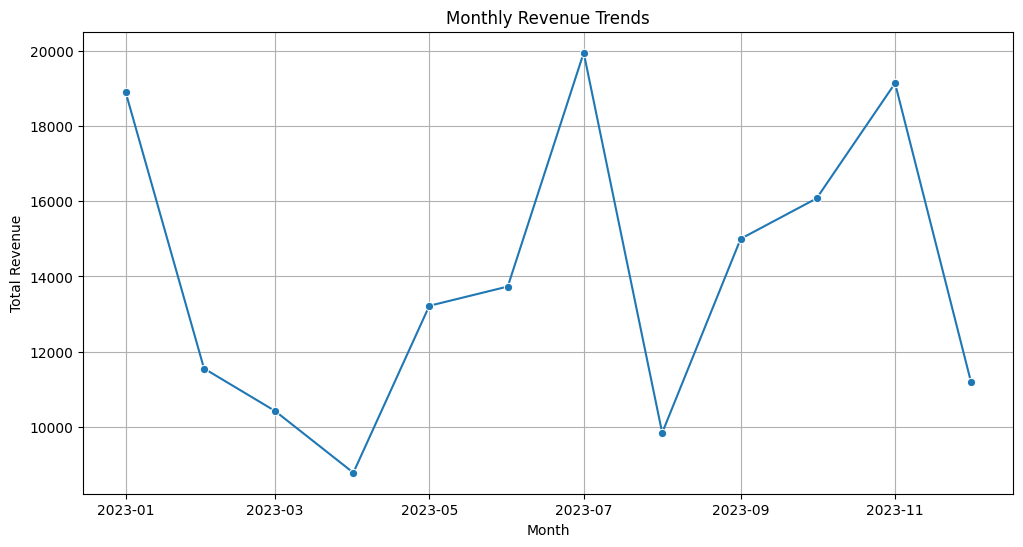

Peak Month: July 2023 with Revenue: $19947.59
Low-Performing Month: April 2023 with Revenue: $8782.97


C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_13064\2314476410.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_revenue, x='Month', y='Revenue', palette='viridis')


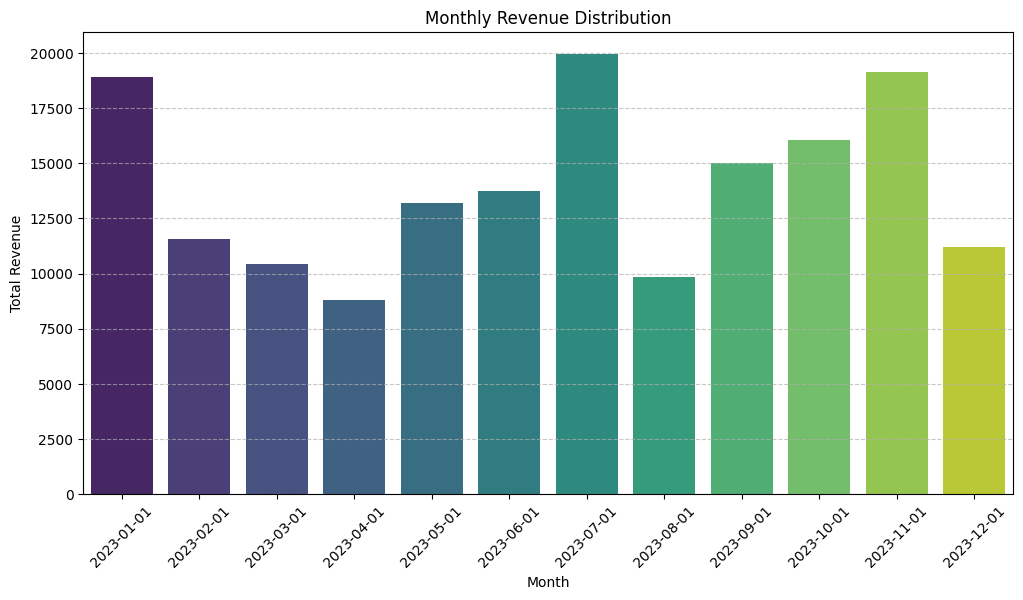

In [8]:
#1. Plot monthly trends in total revenue and identify peak and low-performing months

# Split the single column into separate columns
df[['Month', 'Product', 'UnitsSold', 'Revenue']] = df['Month;Product;UnitsSold;Revenue'].str.split(';', expand=True)

# Convert 'Month' to datetime and 'Revenue' to numeric
df['Month'] = pd.to_datetime(df['Month'])
df['Revenue'] = pd.to_numeric(df['Revenue'])

# Group by month and calculate total revenue
monthly_revenue = df.groupby('Month')['Revenue'].sum().reset_index()

# Plot the monthly revenue trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='Month', y='Revenue', marker='o')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

# Identify peak and low-performing months
peak_month = monthly_revenue.loc[monthly_revenue['Revenue'].idxmax()]
low_month = monthly_revenue.loc[monthly_revenue['Revenue'].idxmin()]

print(f"Peak Month: {peak_month['Month'].strftime('%B %Y')} with Revenue: ${peak_month['Revenue']:.2f}")
print(f"Low-Performing Month: {low_month['Month'].strftime('%B %Y')} with Revenue: ${low_month['Revenue']:.2f}")

# Visualize the monthly revenue data
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_revenue, x='Month', y='Revenue', palette='viridis')
plt.title('Monthly Revenue Distribution')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_13064\1836718136.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_revenue_per_product, x='Product', y='Revenue', palette='coolwarm')


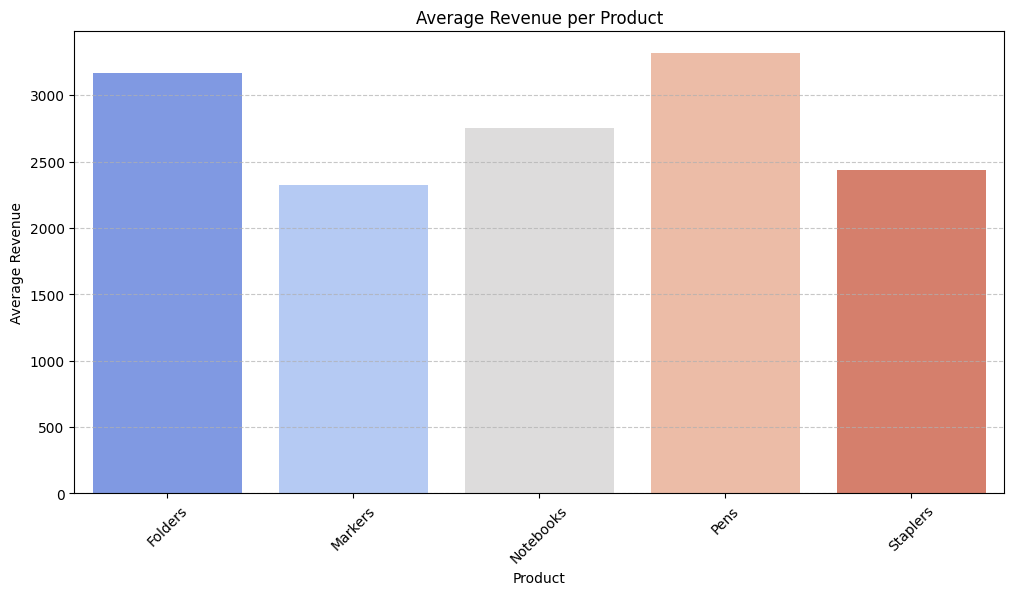

Best-Selling Item: Pens with Average Revenue: $3313.50


In [9]:
#2. Create a bar chart of average revenue per product and identify the best-selling item
# Calculate average revenue per product
average_revenue_per_product = df.groupby('Product')['Revenue'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=average_revenue_per_product, x='Product', y='Revenue', palette='coolwarm')
plt.title('Average Revenue per Product')
plt.xlabel('Product')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Identify the best-selling item
best_selling_item = average_revenue_per_product.loc[average_revenue_per_product['Revenue'].idxmax()]
print(f"Best-Selling Item: {best_selling_item['Product']} with Average Revenue: ${best_selling_item['Revenue']:.2f}")


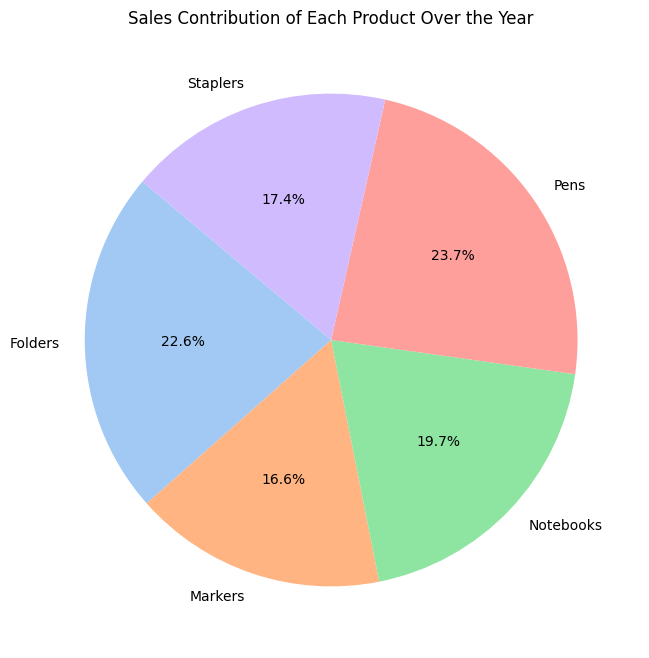

In [10]:
#3.Create a pie or stacked bar chart to show the sales contribution of each product over the year

# Calculate total revenue per product for the year
total_revenue_per_product = df.groupby('Product')['Revenue'].sum().reset_index()

# Plot a pie chart to show sales contribution of each product
plt.figure(figsize=(8, 8))
plt.pie(total_revenue_per_product['Revenue'], labels=total_revenue_per_product['Product'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Sales Contribution of Each Product Over the Year')
plt.show()

Anomalies in Monthly Revenue:
Empty DataFrame
Columns: [Month, Revenue, z_score]
Index: []


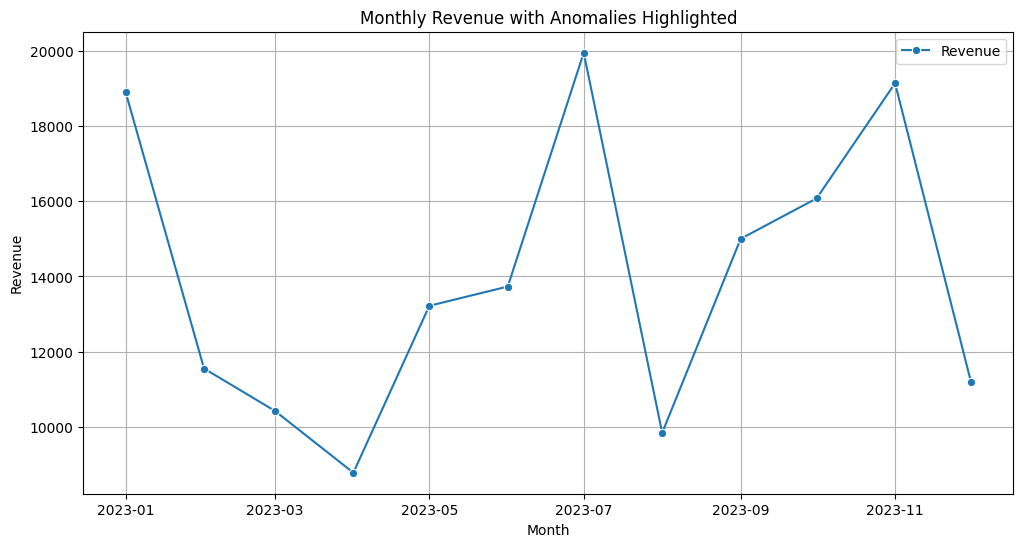

In [11]:
from scipy.stats import zscore

#4. Detect any seasonal patterns or anomalies in the sales

# Detect anomalies in monthly revenue using z-score

# Calculate z-scores for the revenue column
monthly_revenue['z_score'] = zscore(monthly_revenue['Revenue'])

# Define a threshold for anomalies (e.g., z-score > 2 or < -2)
anomalies = monthly_revenue[(monthly_revenue['z_score'] > 2) | (monthly_revenue['z_score'] < -2)]

# Display anomalies
print("Anomalies in Monthly Revenue:")
print(anomalies)

# Visualize anomalies
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='Month', y='Revenue', marker='o', label='Revenue')
sns.scatterplot(data=anomalies, x='Month', y='Revenue', color='red', label='Anomalies', s=100)
plt.title('Monthly Revenue with Anomalies Highlighted')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#The peak month was July 2023 with a revenue of $19947.59.
#The low-performing month was April 2023 with a revenue of $8782.97.
#The best-selling product was Pens with an average revenue of $3313.50.